# Problem statement

- Given a bunch of texts (also called documents), can we group these texts automatically:
  - based on semantics/meaning?
  - based on similarity/topics?



In [12]:
documents = [
  "John went from one bank to another bank to take money out",
  "Today clouds will cover the sky and the sun",
  "She never liked fishing, she liked to walk",
  "Capitalism is based on a banking system and money",
  "Let's go for a walk, because the sun is shinning and the sky is blue",
  "Fishing and banking were his favorite things to do",
]

# Term-Document co-occurrence matrix

Idea: 
- if the same words appears in two different texts, probably these texts have similar meaning

Build the following matrix:


```
       Word_1 Word_2 Word_3 ... Word_F
Text_1   0      2      0           1  
Text_2   1      0      3           0
Text_3   2      0      3           0
...
Text_N   0      4      0           2
```





In [117]:
# ML library, used to convert text documents to a matrix of token/term counts
from sklearn.feature_extraction.text import CountVectorizer

# efficient numerical computation library
import numpy as np

In [14]:
vectorizer = CountVectorizer(stop_words='english')
vectors = vectorizer.fit_transform(documents).todense()
type(vectors)

numpy.matrix

In [15]:
vectors = np.asarray(vectors)
print(type(vectors))
vectors.shape

<class 'numpy.ndarray'>


(6, 20)

In [16]:
vocabulary = vectorizer.get_feature_names_out()
vocabulary

array(['bank', 'banking', 'based', 'blue', 'capitalism', 'clouds',
       'cover', 'favorite', 'fishing', 'john', 'let', 'liked', 'money',
       'shinning', 'sky', 'sun', 'things', 'today', 'walk', 'went'],
      dtype=object)

In [17]:
vectors[0]

array([2, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1])

In [18]:
def print_words_and_frequencies(tf_matrix, row_index):
  text_vector =tf_matrix[row_index]
  word_and_freq = [{'word': vocabulary[idx], 'frequency': freq} for idx,freq in enumerate(text_vector) if freq != 0]
  return word_and_freq

print_words_and_frequencies(vectors,0)

[{'frequency': 2, 'word': 'bank'},
 {'frequency': 1, 'word': 'john'},
 {'frequency': 1, 'word': 'money'},
 {'frequency': 1, 'word': 'went'}]

In [19]:
documents[0]

'John went from one bank to another bank to take money out'

# Stop words

- very common words which are presumed to carry little informative - example: *"the", "to", "from", "a"*
- assumption is that removing them removes noise, and improves prediction

Caveat:
 - it turned out removing stop words is useful for small/simple models, but when using larged/more complex models stop words actually contribute to performance, and removing them is not advised

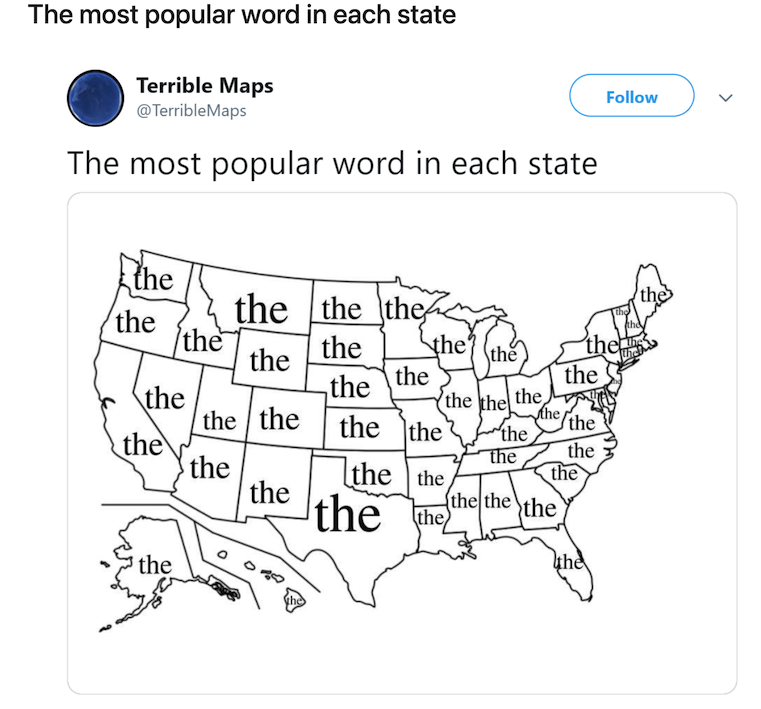

# Topic extraction

Idea:
- documents can be explained/grouped by some underlying topics

- group documents into k topics
  - a topic can be described by a set words
  - a text belongs to a topic if it contains words from a topic

    
- decompose term-document matrix into component matrices
 - topics components
 - coefficient components


In [20]:
# ML library, used for data decomposition
from sklearn.decomposition import NMF

model = NMF(n_components=3)
W_topics = model.fit_transform(vectors)
H_coeff = model.components_

/usr/local/lib/python3.7/dist-packages/sklearn/decomposition/_nmf.py:294: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  FutureWarning,


In [21]:
print(f'Original TF_matrix size:{vectors.shape}')
print(f'Decomposed W topic_matrix size:{W_topics.shape}')
print(f'Decomposed H coeff_matrix size:{H_coeff.shape}')

Original TF_matrix size:(6, 20)
Decomposed W topic_matrix size:(6, 3)
Decomposed H coeff_matrix size:(3, 20)


## Understanding word-topic relationship

In [90]:
# importance of words in a topic
[c for c in H_coeff[0]]

[0.0,
 0.0,
 0.0,
 0.5096205568209067,
 0.0,
 0.4105937072033046,
 0.4105937072033046,
 0.0,
 0.0,
 0.0,
 0.5096205568209067,
 0.0,
 0.0,
 0.5096205568209067,
 0.9209394895746782,
 0.9209394895746782,
 0.0,
 0.4105937072033046,
 0.4805237446857392,
 0.0]

In [85]:
def get_topic_words(topic_index, top_k=None, threshold=0.2):
  topic_words = [{'word':vocabulary[i], 'coeff':'{:.02f}'.format(c)} for i,c in enumerate(H_coeff[topic_index]) if c > threshold]
  topic_words.sort(key=lambda x: x['coeff'], reverse=True)
  if top_k == None:
    return topic_words
  else:
    return topic_words[:top_k]

get_topic_words(0) # weather

[{'coeff': '0.92', 'word': 'sky'},
 {'coeff': '0.92', 'word': 'sun'},
 {'coeff': '0.51', 'word': 'blue'},
 {'coeff': '0.51', 'word': 'let'},
 {'coeff': '0.51', 'word': 'shinning'},
 {'coeff': '0.48', 'word': 'walk'},
 {'coeff': '0.41', 'word': 'clouds'},
 {'coeff': '0.41', 'word': 'cover'},
 {'coeff': '0.41', 'word': 'today'}]

In [86]:
get_topic_words(1) # financial

[{'coeff': '1.17', 'word': 'bank'},
 {'coeff': '0.75', 'word': 'money'},
 {'coeff': '0.58', 'word': 'john'},
 {'coeff': '0.58', 'word': 'went'}]

In [88]:
get_topic_words(2) # activities

[{'coeff': '1.04', 'word': 'liked'},
 {'coeff': '0.75', 'word': 'fishing'},
 {'coeff': '0.53', 'word': 'walk'},
 {'coeff': '0.28', 'word': 'banking'},
 {'coeff': '0.23', 'word': 'favorite'},
 {'coeff': '0.23', 'word': 'things'}]

In [113]:
import matplotlib.pyplot as plt
%matplotlib inline

Topic 0 ~ weather


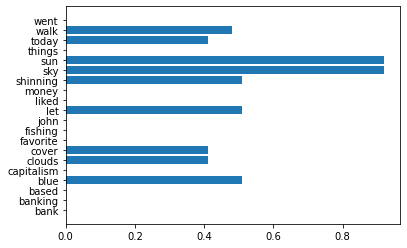

In [124]:
y_axis = np.arange(0,20,1)
plt.barh(y_axis, H_coeff[0], align='center')
plt.yticks(y_axis, vocabulary)
print('Topic 0 ~ weather')

Topic 1 ~ financial;


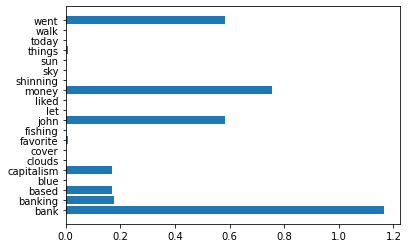

In [125]:
y_axis = np.arange(0,20,1)
plt.barh(y_axis, H_coeff[1], align='center')
plt.yticks(y_axis, vocabulary)
print('Topic 1 ~ financial')

Topic 2 ~ activities


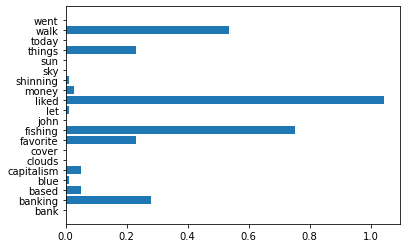

In [126]:
y_axis = np.arange(0,20,1)
plt.barh(y_axis, H_coeff[2], align='center')
plt.yticks(y_axis, vocabulary)
print('Topic 2 ~ activities')

# Understanding text-topic relationship

In [127]:
# similarity of texts to a topic
print(f'          wheater - financial - activities')
[t for t in W_topics]

          wheater - financial - activities


[array([0.        , 1.57475613, 0.        ]),
 array([0.95690889, 0.        , 0.        ]),
 array([0.01534882, 0.        , 1.57850489]),
 array([0.        , 0.46542612, 0.1721361 ]),
 array([1.18938603, 0.        , 0.11306563]),
 array([0.        , 0.04803812, 0.69797866])]

Today clouds will cover the sky and the sun


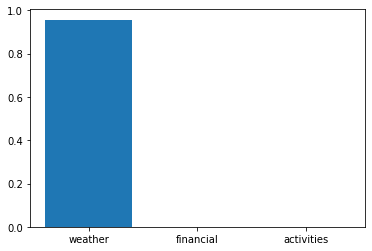

In [108]:
plt.bar(['weather','financial','activities'], W_topics[1])
documents[1]

'Capitalism is based on a banking system and money'

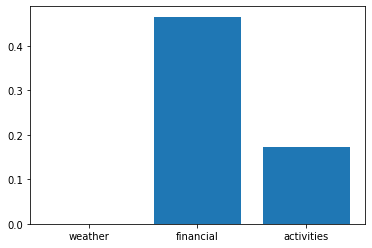

In [110]:
plt.bar(['weather','financial','activities'], W_topics[3])
documents[3]

"Let's go for a walk, because the sun is shinning and the sky is blue"

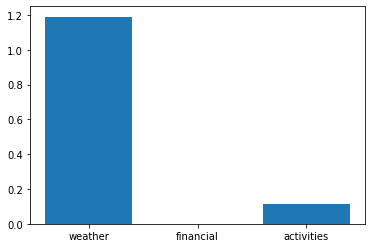

In [112]:
plt.bar(['weather','financial','activities'], W_topics[4])
documents[4]

### Can we do better?

- banking and bank - why are they considered different words
	- **Lemmatization** - using language rules to get to the root of a word
	- **Stemming** - using chop-off to get to root of a word, "the poor man's lemmatization"
Stemming/Lemmatization

```
bank -> bank
banks -> bank
banking -> bank
banker -> bank
```



### Can we do better?

- instead of simply using the count of a word(term frequency), we could use something more sophisticated
- normalize count
  - based on document length
  - based on how common/rare is a word (rare word are considered to carry more information)

**TF-IDF** - Term Frequency-Inverse Document Frequency

- TF = (number occurrences of term t in document) / (numer of words in documents)
- IDF = log(numer of documents / number documents with term t in it)


# How does all this work?

## NMF (Non-Negative Matrix Factorization)
- 30 year old technique (1981 Jeter and Pye, 1984 Chen)
- versatile data decomposition technique that has proven useful for various appliactions
 - feature learning, **topic extraction**, clustering, segmentation
 - audio and video processing (channel separation)

### Number Factorization

- the "opposite" of multiplication
- decompose number into prime factor, primitive components



```
60
| \
2  30
|  |  \
2  2  15
|  |   |  \
2  2   3   5

60 = 2*2*3*5
```

- it is a much harder operation, than multiplication (it serves as a basis for many encryption algorithms)

### Matrix Factorization (Matrix Decomposition)


- the "opposite" of [matrix multiplication](http://matrixmultiplication.xyz/)
- decompose matrix into primitive components - matrices with nice properties

There are several techniques, today we'll look at NMF (Non-Negative Matrix Factorization)


```
V - original matrix
W - topics/basis - decomposed matrix
H - importance coefficients - decomposed matrix

V      ~   W   *   H
(f x N) (f x k) (k x N)


N - number of examples, sample size, 
f - number of features 

k - number of components

```


- it is much harder operation, than multiplication

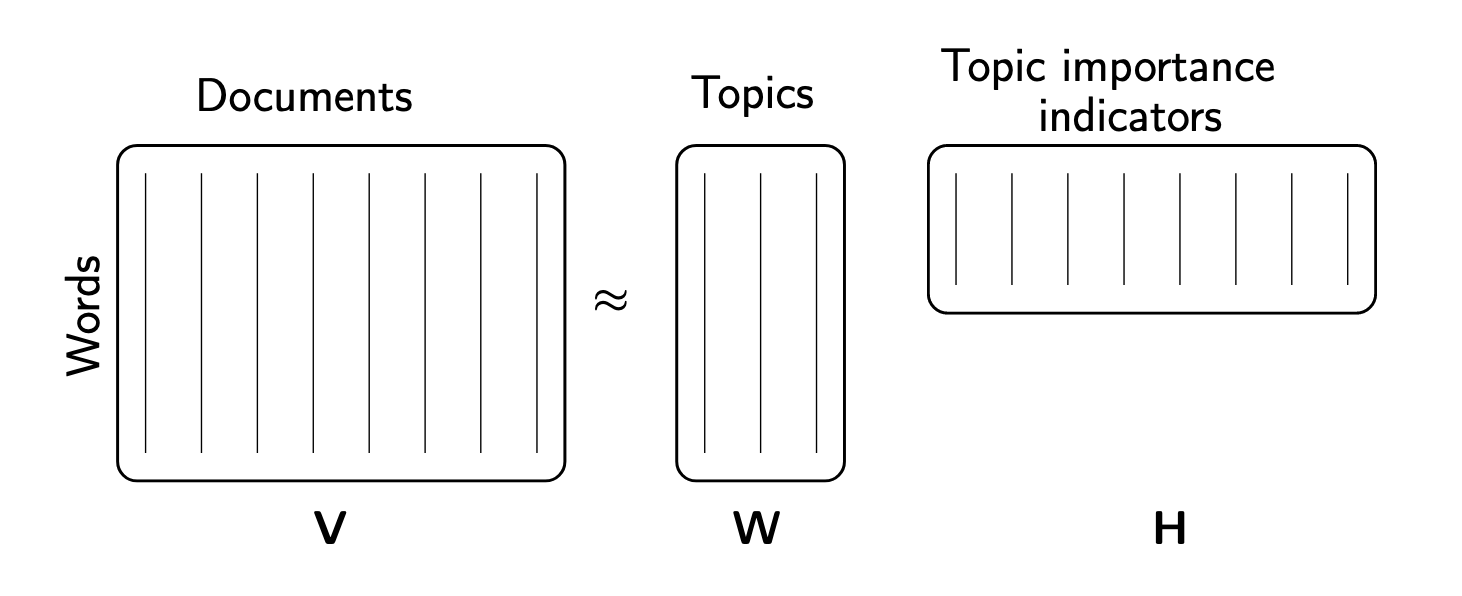

# How is it calculated?

- non-supervised data decomposition technique
- topics/features are learned similarly to PCA/ linear dimensionality reduction - minimizing least squares errors (difference between reconstructed value and actual values)
- non-exact factorization, NP-hard and non-unique solution, there are a number of variations on it, created by adding different constraints

# Key learnings

- Simply using word frequencies we can extract topics from texts automatically
- The extracted topics kind of match expected grouping based on similarity


References

- [fast.ai course - Code-First intro to NLP](https://github.com/fastai/course-nlp/blob/master/2b-odds-and-ends.ipynb)
- [NMF tutorial - form telecom-paristech](https://perso.telecom-paristech.fr/essid/teach/NMF_tutorial_ICME-2014.pdf)